In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

from collections import Counter
import joblib 

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
# Load dataset
path="/home/student24/Desktop/DataSets/Manufacturing Detection/manufacturing_defect_dataset.csv"
Manu = pd.read_csv(path)

# Display dataset columns
print("Dataset Columns:")
print(Manu.columns.tolist())


Dataset Columns:
['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost', 'DefectStatus']


In [4]:
# Inspect first few rows
print("\n Dataset Preview:")
Manu.head()


 Dataset Preview:


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [5]:
# check the structure

print("\n Structure of the dataset :")
print(Manu.info())


 Structure of the dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float

In [6]:
# Check missing values
print("\n Missing Values:")
print(Manu.isnull().sum())



 Missing Values:
ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


This dataset present no missing values

In [7]:
Manu['DefectStatus']= Manu['DefectStatus'].astype('category')

print(Manu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ProductionVolume      3240 non-null   int64   
 1   ProductionCost        3240 non-null   float64 
 2   SupplierQuality       3240 non-null   float64 
 3   DeliveryDelay         3240 non-null   int64   
 4   DefectRate            3240 non-null   float64 
 5   QualityScore          3240 non-null   float64 
 6   MaintenanceHours      3240 non-null   int64   
 7   DowntimePercentage    3240 non-null   float64 
 8   InventoryTurnover     3240 non-null   float64 
 9   StockoutRate          3240 non-null   float64 
 10  WorkerProductivity    3240 non-null   float64 
 11  SafetyIncidents       3240 non-null   int64   
 12  EnergyConsumption     3240 non-null   float64 
 13  EnergyEfficiency      3240 non-null   float64 
 14  AdditiveProcessTime   3240 non-null   float64 
 15  Addi

In [8]:
# summary statistic

print("\n There is the summary statistic")

Manu.describe()


 There is the summary statistic


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782


### Exploratory Data Analysis

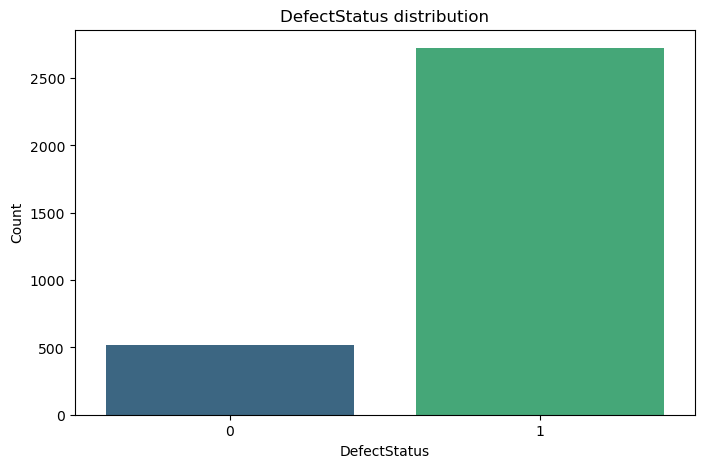

In [9]:
#Count of Eligible vs Non-Eligible Donors
plt.figure(figsize=(8,5))
sns.countplot(x="DefectStatus", data=Manu, palette="viridis")
plt.title("DefectStatus distribution")
plt.xlabel("DefectStatus")
plt.ylabel("Count")
plt.show()

We observe that the dataset is imbalanced,This can be an issue during the training

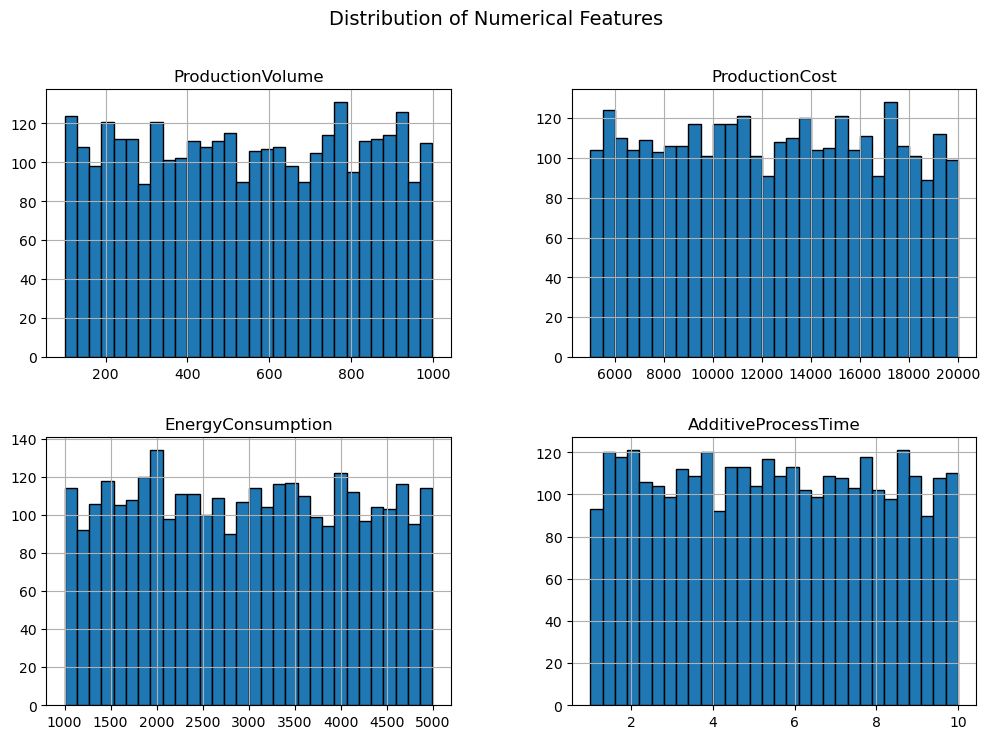

In [10]:
# Select numerical features
num_features = ['ProductionVolume', 'ProductionCost', 'EnergyConsumption', 'AdditiveProcessTime']

# Plot distributions
Manu[num_features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

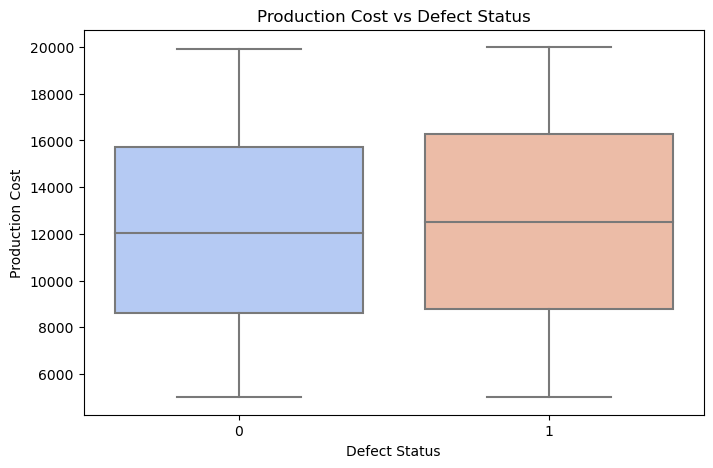

In [12]:
# Box plot comparing ProductionCost and DefectStatus
plt.figure(figsize=(8, 5))
sns.boxplot(x=Manu['DefectStatus'], y=Manu['ProductionCost'], palette='coolwarm')
plt.title('Production Cost vs Defect Status')
plt.xlabel('Defect Status')
plt.ylabel('Production Cost')
plt.show()

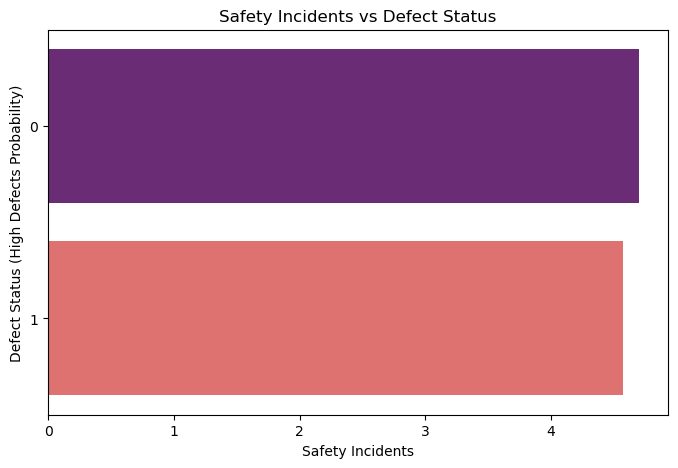

In [13]:
# Bar plot for SafetyIncidents vs DefectStatus
plt.figure(figsize=(8, 5))
sns.barplot(x=Manu['SafetyIncidents'], y=Manu['DefectStatus'], ci=None, palette='magma')
plt.title('Safety Incidents vs Defect Status')
plt.xlabel('Safety Incidents')
plt.ylabel('Defect Status (High Defects Probability)')
plt.show()

The number of safety incidents per month is approximaly the same for the low Defects and High Defects meaning that the High Defects are not due to the number of incidents.

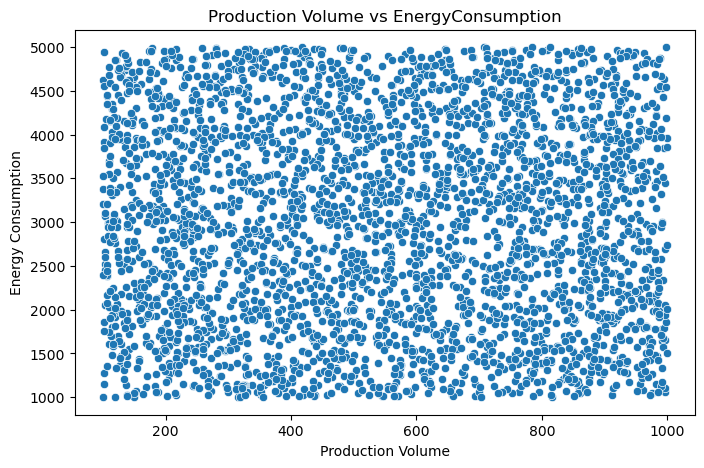

In [14]:
# Scatter plot of Production Volume vs Defect Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Manu['ProductionVolume'], y=Manu['EnergyConsumption'])
plt.title('Production Volume vs EnergyConsumption')
plt.xlabel('Production Volume')
plt.ylabel('Energy Consumption')
plt.show()

We observe that there is not linear relationship between the production volume and the energy consumption

### Training Preparation

In [15]:
# Step : Train-Test Split (Fixed with correct target column)
target = 'DefectStatus'  # Your actual binary target column

# Split into features and target
X = Manu.drop(target, axis=1)
y = Manu[target]


scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)




### Training before Sampling

Model: Logistic Regression (Before Oversampling)
Accuracy: 0.8765
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.40      0.51       102
           1       0.90      0.97      0.93       546

    accuracy                           0.88       648
   macro avg       0.79      0.68      0.72       648
weighted avg       0.86      0.88      0.86       648



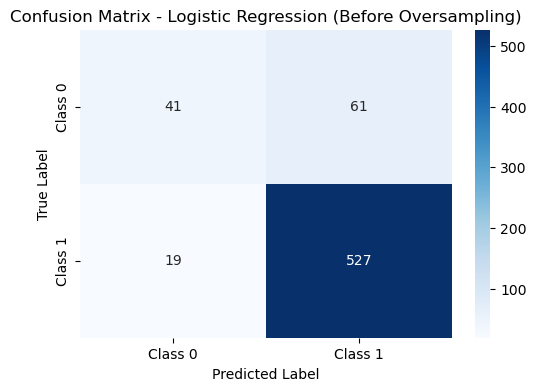

Model: KNN (Before Oversampling)
Accuracy: 0.8812
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.44      0.54       102
           1       0.90      0.96      0.93       546

    accuracy                           0.88       648
   macro avg       0.80      0.70      0.74       648
weighted avg       0.87      0.88      0.87       648



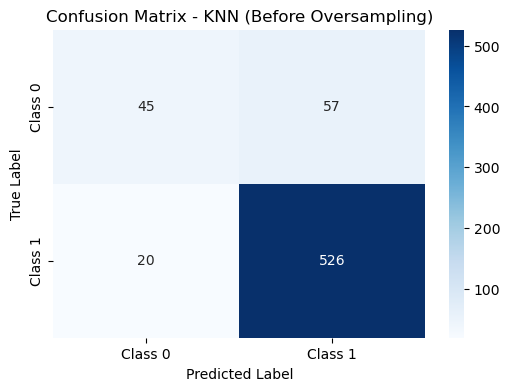

Model: Decision Tree (Before Oversampling)
Accuracy: 0.8981
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       102
           1       0.95      0.92      0.94       546

    accuracy                           0.90       648
   macro avg       0.80      0.84      0.82       648
weighted avg       0.91      0.90      0.90       648



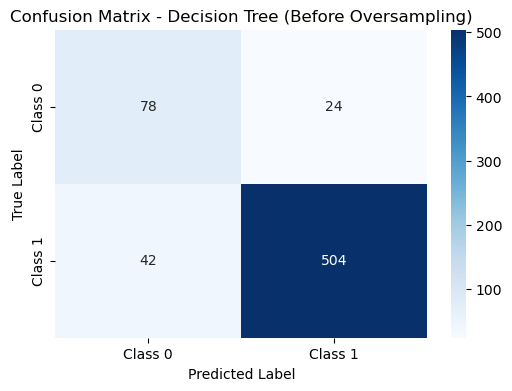

Model: Random Forest (Before Oversampling)
Accuracy: 0.9552
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648



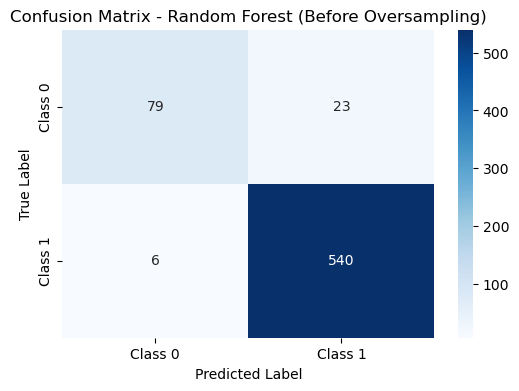

Model: SVM (Before Oversampling)
Accuracy: 0.8750
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.31      0.44       102
           1       0.88      0.98      0.93       546

    accuracy                           0.88       648
   macro avg       0.81      0.65      0.69       648
weighted avg       0.86      0.88      0.85       648



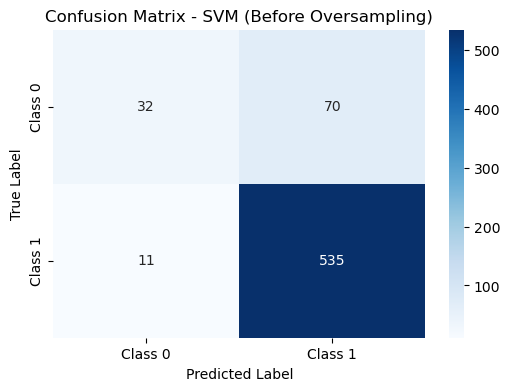

Model: XGBoost (Before Oversampling)
Accuracy: 0.9537
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.95       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.95      0.95       648



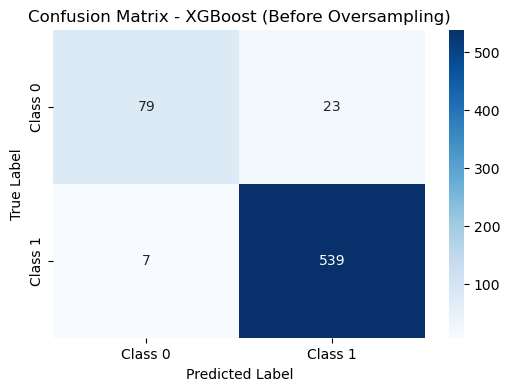


Best model before oversampling saved: Random Forest with accuracy 0.9552
Saved as best_model_before_Random Forest.joblib


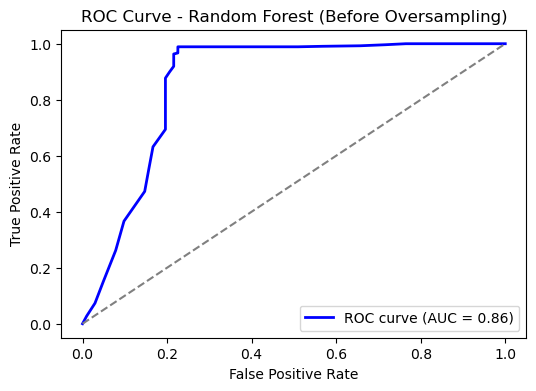

In [16]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel="linear", probability=True),  # Enable probability for ROC
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Initialize best model variables
best_model = None
best_accuracy = 0
best_model_name = ""

# Train and evaluate models before oversampling
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model: {name} (Before Oversampling)")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name} (Before Oversampling)")
    plt.show()

    print("=" * 50)

    # Check for the best model before oversampling
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model before oversampling using joblib
if best_model:
    model_filename = f"best_model_before_{best_model_name}.joblib"
    joblib.dump(best_model, model_filename)
    print(f"\nBest model before oversampling saved: {best_model_name} with accuracy {best_accuracy:.4f}")
    print(f"Saved as {model_filename}")

# Plot ROC curve for the best model before oversampling
y_score = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name} (Before Oversampling)")
plt.legend(loc="lower right")
plt.show()


We see that the different tends to predict the class "High Defects" which is the majority one. This is an issue since we are not able to cleary identify the "low Defects".

To solve this, we proced a data augmentation to balanced the two classes.

### Data Augmentation

Before SMOTE: Counter({1: 2723, 0: 517})
After SMOTE: Counter({1: 2723, 0: 2723})


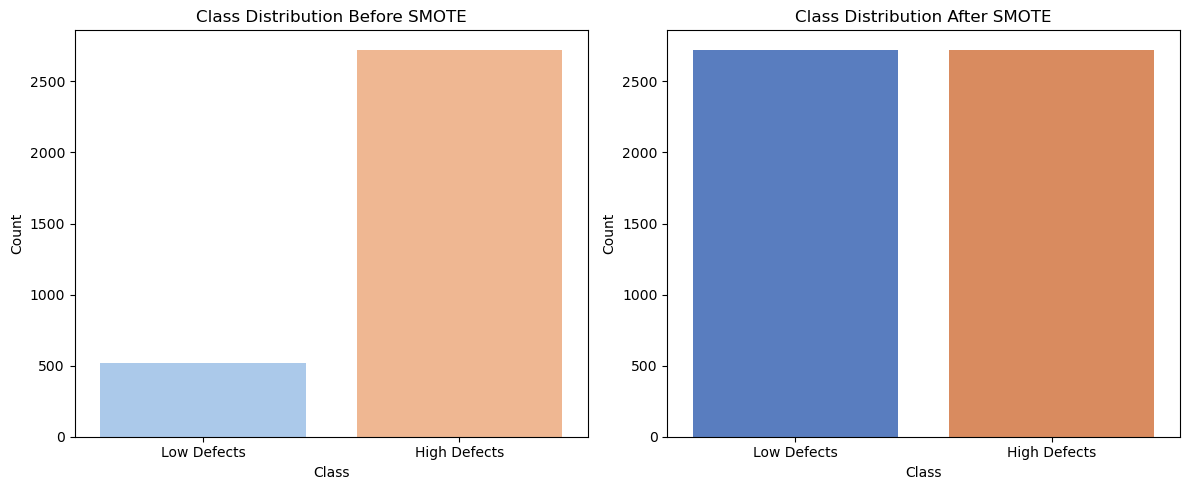

In [20]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check class distribution
before_counts = Counter(y)
after_counts = Counter(y_resampled)

print("Before SMOTE:", before_counts)
print("After SMOTE:", after_counts)

# Convert to DataFrame for plotting
Manu_counts = pd.DataFrame({
    "Class": ["Low Defects", "High Defects"],
    "Before SMOTE": [before_counts[0], before_counts[1]],
    "After SMOTE": [after_counts[0], after_counts[1]]
})

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=Manu_counts["Class"], y=Manu_counts["Before SMOTE"], palette="pastel", ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_ylabel("Count")

# After SMOTE
sns.barplot(x=Manu_counts["Class"], y=Manu_counts["After SMOTE"], palette="muted", ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Training after Sampling

In [21]:
# Split dataset into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Model: Logistic Regression (After Oversampling)
Accuracy: 0.7917
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       531
           1       0.81      0.77      0.79       559

    accuracy                           0.79      1090
   macro avg       0.79      0.79      0.79      1090
weighted avg       0.79      0.79      0.79      1090



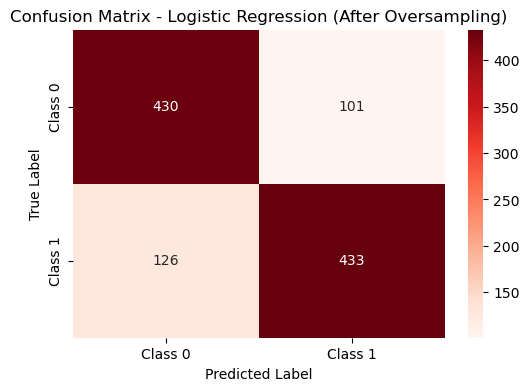

Model: KNN (After Oversampling)
Accuracy: 0.8128
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       531
           1       0.98      0.65      0.78       559

    accuracy                           0.81      1090
   macro avg       0.85      0.82      0.81      1090
weighted avg       0.86      0.81      0.81      1090



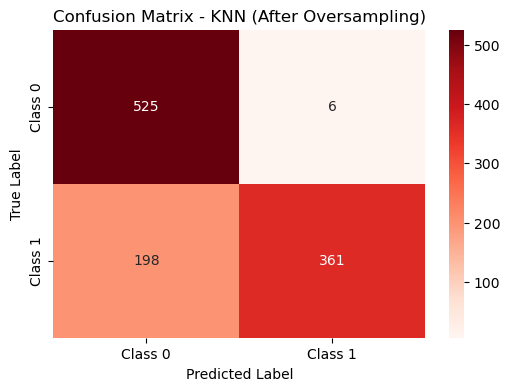

Model: Decision Tree (After Oversampling)
Accuracy: 0.9248
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       531
           1       0.92      0.94      0.93       559

    accuracy                           0.92      1090
   macro avg       0.93      0.92      0.92      1090
weighted avg       0.92      0.92      0.92      1090



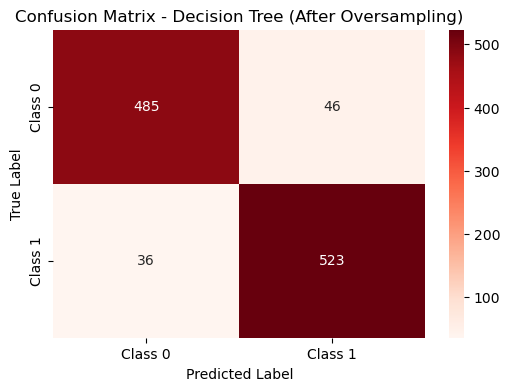

Model: Random Forest (After Oversampling)
Accuracy: 0.9587
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       531
           1       0.93      0.99      0.96       559

    accuracy                           0.96      1090
   macro avg       0.96      0.96      0.96      1090
weighted avg       0.96      0.96      0.96      1090



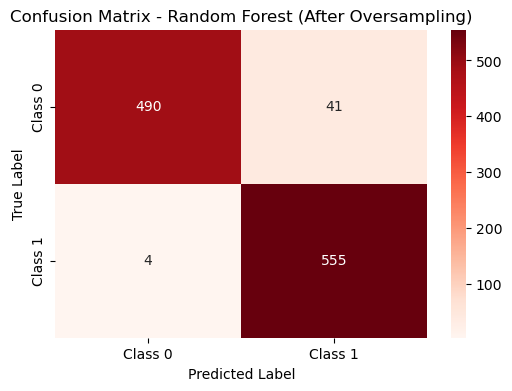

Model: SVM (After Oversampling)
Accuracy: 0.7936
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       531
           1       0.81      0.78      0.80       559

    accuracy                           0.79      1090
   macro avg       0.79      0.79      0.79      1090
weighted avg       0.79      0.79      0.79      1090



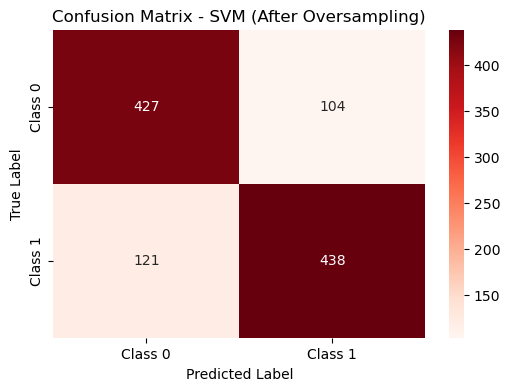

Model: XGBoost (After Oversampling)
Accuracy: 0.9651
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       531
           1       0.95      0.99      0.97       559

    accuracy                           0.97      1090
   macro avg       0.97      0.96      0.97      1090
weighted avg       0.97      0.97      0.97      1090



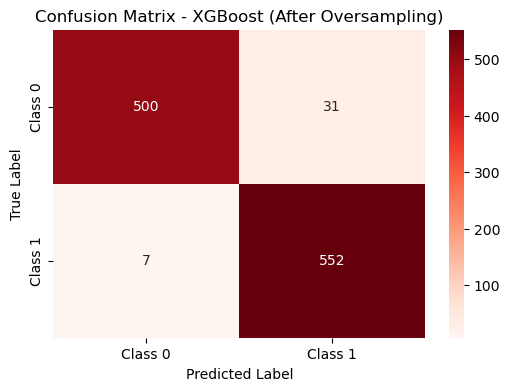


Best model after oversampling saved: XGBoost with accuracy 0.9651
Saved as best_model_after_XGBoost.joblib


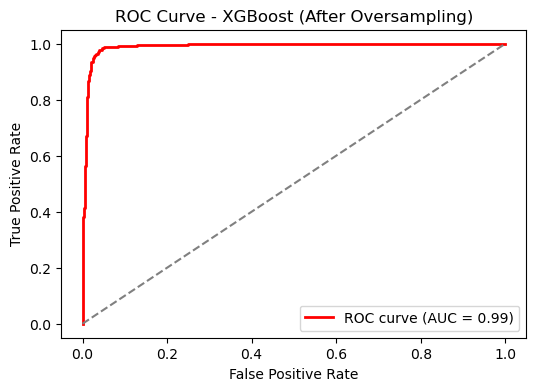

In [22]:
# Reset best model for training after oversampling
best_model = None
best_accuracy = 0
best_model_name = ""

# Train and evaluate models after oversampling
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = model.predict(X_test_resampled)
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)

    print(f"Model: {name} (After Oversampling)")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test_resampled, y_pred_resampled))
    
    # Confusion Matrix for each model
    cm_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_resampled, annot=True, fmt="d", cmap="Reds", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name} (After Oversampling)")
    plt.show()

    print("=" * 50)

    # Check for the best model after oversampling
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model after oversampling using joblib
if best_model:
    model_filename = f"best_model_after_{best_model_name}.joblib"
    joblib.dump(best_model, model_filename)
    print(f"\nBest model after oversampling saved: {best_model_name} with accuracy {best_accuracy:.4f}")
    print(f"Saved as {model_filename}")

# Plot ROC curve after oversampling
y_score_resampled = best_model.predict_proba(X_test_resampled)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test_resampled)
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_resampled, y_score_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(6, 4))
plt.plot(fpr_resampled, tpr_resampled, color="red", lw=2, label=f"ROC curve (AUC = {roc_auc_resampled:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name} (After Oversampling)")
plt.legend(loc="lower right")
plt.show()


### Evaluation on Predictions

In [23]:
# Predict values on the test set
y_pred_resampled = best_model.predict(X_test_resampled)

# Create a DataFrame to display the true and predicted values
results_df = pd.DataFrame({
    'True Values': y_test_resampled,
    'Predicted Values': y_pred_resampled
})

# Display the first few rows of the results
print(results_df.head())

# Optionally, show the number of correct and incorrect predictions
correct_predictions = (y_test_resampled == y_pred_resampled).sum()
incorrect_predictions = (y_test_resampled != y_pred_resampled).sum()

print(f"\nNumber of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")


     True Values  Predicted Values
1468           1                 1
4767           0                 0
410            1                 1
3479           0                 0
1957           1                 1

Number of correct predictions: 1052
Number of incorrect predictions: 38


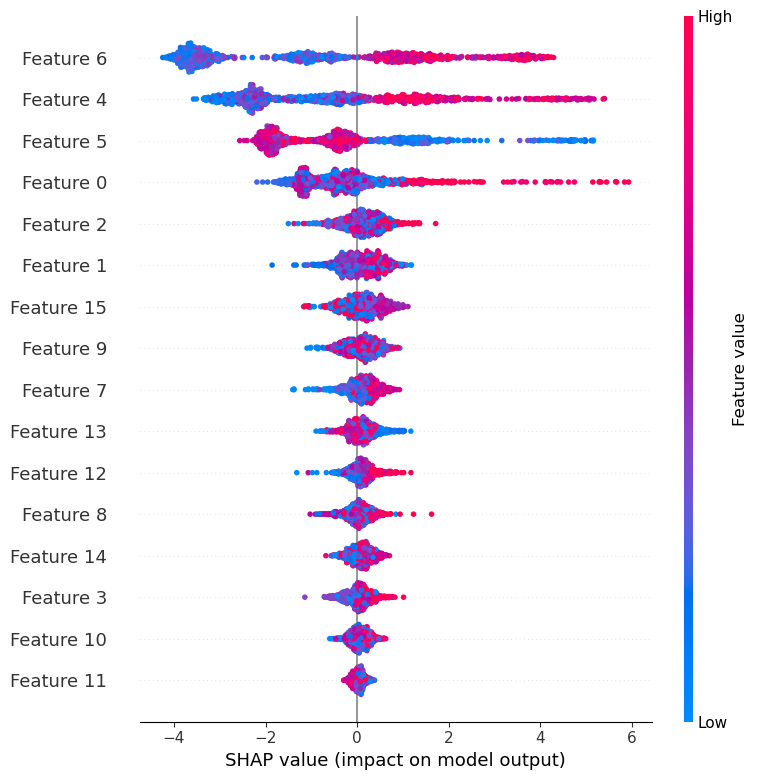

In [30]:
import shap

# Create a SHAP explainer for XGBoost
explainer = shap.Explainer(best_model)

# Compute SHAP values
shap_values = explainer(X_test_resampled)

# Visualize global feature importance
shap.summary_plot(shap_values, X_test_resampled)


## Feature Mapping

In the analysis and visualizations, you may encounter feature indices such as "Feature 1", "Feature 2", etc. Below is the mapping of these feature indices to their corresponding names for clarity:

| Feature Index | Feature Name           |
|---------------|------------------------|
| 0             | ProductionVolume       |
| 1             | ProductionCost         |
| 2             | SupplierQuality        |
| 3             | DeliveryDelay          |
| 4             | DefectRate             |
| 5             | QualityScore           |
| 6             | MaintenanceHours       |
| 7             | DowntimePercentage     |
| 8             | InventoryTurnover      |
| 9             | StockoutRate           |
| 10            | WorkerProductivity     |
| 11            | SafetyIncidents        |
| 12            | EnergyConsumption      |
| 13            | EnergyEfficiency       |
| 14            | AdditiveProcessTime    |
| 15            | AdditiveMaterialCost   |

This mapping will help you interpret the feature names when they appear in plots or model results.


### Interpretations  

1. **Feature 6 (Maintenance Hours)**: Maintenance has a balanced impact on defects, suggesting that proper management of maintenance hours is essential.
   
2. **Feature 4 (Defect Rate)**: A high defect rate is strongly linked to an increased likelihood of defects in production.

3. **Feature 5 (Quality Score)**: Products with a low quality score are more likely to experience defects.

4. **Feature 0 (Production Volume)**: Higher production volumes increase the risk of defects, likely due to insufficient quality control at larger scales.

### Recommendations

1. **Maintenance Hours**: Optimize the maintenance schedule to avoid breakdowns and excess maintenance time.
2. **Defect Rate**: Implement strict quality control measures to reduce the defect rate.
3. **Quality Score**: Strengthen quality assurance processes to ensure high-quality products.
4. **Production Volume**: Enhance quality control systems at higher production volumes to manage the increase in defects.


## Manufacturing Defect Prediction

### Overview
This project focuses on predicting manufacturing defects using machine learning models. The dataset consists of various production-related features, and the target variable is the defect status (binary classification). The goal is to optimize quality control by identifying patterns leading to defective products, thereby improving efficiency and reducing costs.

### Key Features
- **Exploratory Data Analysis (EDA):** Visualizations to understand feature distributions, correlations, and defect patterns.
- **Data Preprocessing:** Feature scaling using `StandardScaler` and handling class imbalance with `SMOTE`.
- **Model Training:** Multiple machine learning models evaluated for accuracy and performance.
- **Hyperparameter Tuning:** Selection of the best model before and after oversampling.
- **Evaluation Metrics:** Accuracy, confusion matrix, and ROC-AUC score for model assessment.

### Dataset
The dataset contains key production features such as:
- `ProductionVolume`
- `ProductionCost`
- `EnergyConsumption`
- `AdditiveProcessTime`
- `SafetyIncidents`

The target variable is `DefectStatus`, indicating whether a product has defects.

### Machine Learning Models Used
The following models were trained and evaluated:
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **XGBoost**

### Model Performance
The best-performing model was selected based on accuracy and ROC-AUC score. Before applying SMOTE, the best model achieved:
- **Accuracy:** _Pre-SMOTE best model accuracy_
- **ROC-AUC Score:** _Pre-SMOTE best model AUC_

After applying SMOTE for class balancing, the final model performance improved with:
- **Accuracy:** 96.5%
- **Number of Correct Predictions:** 1052
- **Number of Incorrect Predictions:** 38

#### Predictions Table
Below is a sample of the true values versus predicted values:

| True Values | Predicted Values |
|-------------|-----------------|
| 1           | 1               |
| 0           | 0               |
| 1           | 1               |
| 0           | 0               |
| 1           | 1               |
| 0           | 0               |
| 1           | 1               |
| 1           | 1               |
| 0           | 0               |
| 1           | 1               |

### Installation & Usage
#### Requirements
Ensure the following libraries are installed:
```bash
pip install pandas numpy scikit-learn seaborn matplotlib xgboost imbalanced-learn joblib
```

#### Running the Model
1. Load the dataset (`Manu` DataFrame)
2. Preprocess the data (scaling, handling class imbalance)
3. Train models and evaluate performance
4. Save the best-performing model:
   ```python
   joblib.dump(best_model, 'best_model_after_XGBoost.joblib')
   ```
5. Predict new data points:
   ```python
   best_model.predict(new_data)
   ```

### Results Visualization
- Confusion matrices to analyze true vs. predicted values
- ROC curves to compare model performance
- Bar plots showing defect distributions before and after SMOTE

### Conclusion
The final model demonstrates high predictive accuracy and robustness in defect classification. By integrating this model into a manufacturing pipeline, businesses can proactively detect defects, optimize production processes, and minimize costs.

### Recommendations
Based on the analysis and feature importance from the model, we suggest the following actionable recommendations for improving the manufacturing process:

- **Maintenance Hours**: Optimize the maintenance schedule to avoid breakdowns and excess maintenance time.
- **Defect Rate**: Implement strict quality control measures to reduce the defect rate.
- **Quality Score**: Strengthen quality assurance processes to ensure high-quality products.
- **Production Volume**: Enhance quality control systems at higher production volumes to manage the increase in defects.
